In [1]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd

In [23]:
url = 'https://www.mois.go.kr/frt/sub/a02/farmProductPriceList/screen.do'
driver = webdriver.Chrome()
driver.get(url)

# iframe
iframe = driver.find_element(By.CSS_SELECTOR, 'iframe')
driver.switch_to.frame(iframe)

head_lst=[] #식재료
html=driver.find_elements(By.CSS_SELECTOR, 'div.tableBox01 thead th')
for th in html:
    head_lst.append(th.text)

html = driver.page_source
soup = BeautifulSoup(html,'lxml')
driver.quit()

body_lst = [] #가격 2D
index_lst = [] #지역
t_body = soup.select('div.tableBox01 tbody tr.first')

for body in t_body:
    price = body.select('td:not(.head)')
    city = body.select_one('td.head')

    index_lst.append(city.text)
    sub_body = []
    for p in price:
        if p.text.strip() == '-':
            break
        sub_body.append(int(p.text.strip().replace(',','')))

    if len(sub_body) == 0:
        continue
    body_lst.append(sub_body)

print(body_lst)
print(index_lst)


    
    



[[13914, 2770, 8636, 3828, 6927, 3371, 5729, 5613, 12444, 56766], [12131, 2994, 8208, 4165, 5882, 3514, 4747, 4482, 10987, 58862], [12648, 2876, 9519, 3486, 6608, 3913, 4285, 4168, 10949, 56728], [12849, 2782, 8008, 3308, 6281, 3289, 4992, 4808, 11848, 59028], [14343, 3223, 8070, 3409, 5939, 2777, 6150, 4567, 9458, 56720], [11756, 2469, 7925, 3793, 5851, 3386, 4171, 5022, 11279, 55553], [12373, 2759, 7897, 3601, 7025, 3435, 5639, 5131, 11327, 57320], [11278, 2651, 7836, 3534, 6559, 3243, 5080, 4570, 12391, 61710], [11587, 2809, 8366, 3270, 7292, 3866, 5488, 3993, 10811, 60233], [12842, 2949, 8348, 4089, 5963, 3956, 5334, 3801, 12957, 56262], [12603, 2550, 7533, 3469, 6604, 3692, 5897, 4626, 9894, 53893], [12868, 2783, 7479, 3228, 6194, 3400, 5505, 3175, 8498, 55910], [12362, 2676, 7373, 3222, 6399, 2979, 5738, 3628, 10278, 60881], [11161, 2483, 7750, 3418, 7007, 3341, 4545, 3994, 12580, 58185], [11655, 2552, 7337, 4012, 6471, 3212, 5065, 3589, 9762, 57244], [12108, 2718, 7643, 3628, 70

In [25]:
#구분 지우기
head_lst = head_lst[1:]
#세종 지우기
index_lst.remove('세종')

In [29]:
df = pd.DataFrame(body_lst, columns = head_lst, index = index_lst)
df

,쇠고기,돼지고기,닭고기,달걀,배추,무,감자,고추가루,콩,쌀
서울,13914,2770,8636,3828,6927,3371,5729,5613,12444,56766
부산,12131,2994,8208,4165,5882,3514,4747,4482,10987,58862
대구,12648,2876,9519,3486,6608,3913,4285,4168,10949,56728
인천,12849,2782,8008,3308,6281,3289,4992,4808,11848,59028
광주,14343,3223,8070,3409,5939,2777,6150,4567,9458,56720
대전,11756,2469,7925,3793,5851,3386,4171,5022,11279,55553
울산,12373,2759,7897,3601,7025,3435,5639,5131,11327,57320
경기,11278,2651,7836,3534,6559,3243,5080,4570,12391,61710
강원,11587,2809,8366,3270,7292,3866,5488,3993,10811,60233
충북,12842,2949,8348,4089,5963,3956,5334,3801,12957,56262


In [31]:
df.mean()

쇠고기     12404.8750
돼지고기     2752.7500
닭고기      7995.5000
달걀       3591.2500
배추       6505.0000
무        3412.2500
감자       5200.5000
고추가루     4310.8750
콩       11086.4375
쌀       57463.2500
dtype: float64

In [33]:
df.T.mean()

서울    11999.8
부산    11597.2
대구    11518.0
인천    11719.3
광주    11465.6
대전    11120.5
울산    11650.7
경기    11885.2
강원    11771.5
충북    11650.1
충남    11076.1
전북    10904.0
전남    11553.6
경북    11446.4
경남    11089.9
제주    11108.4
dtype: float64

In [35]:
df.sort_values(by=['쇠고기'])

,쇠고기,돼지고기,닭고기,달걀,배추,무,감자,고추가루,콩,쌀
경북,11161,2483,7750,3418,7007,3341,4545,3994,12580,58185
경기,11278,2651,7836,3534,6559,3243,5080,4570,12391,61710
강원,11587,2809,8366,3270,7292,3866,5488,3993,10811,60233
경남,11655,2552,7337,4012,6471,3212,5065,3589,9762,57244
대전,11756,2469,7925,3793,5851,3386,4171,5022,11279,55553
제주,12108,2718,7643,3628,7078,3222,4843,3807,11920,54117
부산,12131,2994,8208,4165,5882,3514,4747,4482,10987,58862
전남,12362,2676,7373,3222,6399,2979,5738,3628,10278,60881
울산,12373,2759,7897,3601,7025,3435,5639,5131,11327,57320
충남,12603,2550,7533,3469,6604,3692,5897,4626,9894,53893


In [37]:
df.T.mean().sort_values(ascending=False)

서울    11999.8
경기    11885.2
강원    11771.5
인천    11719.3
울산    11650.7
충북    11650.1
부산    11597.2
전남    11553.6
대구    11518.0
광주    11465.6
경북    11446.4
대전    11120.5
제주    11108.4
경남    11089.9
충남    11076.1
전북    10904.0
dtype: float64

In [39]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font',family='AppleGothic')

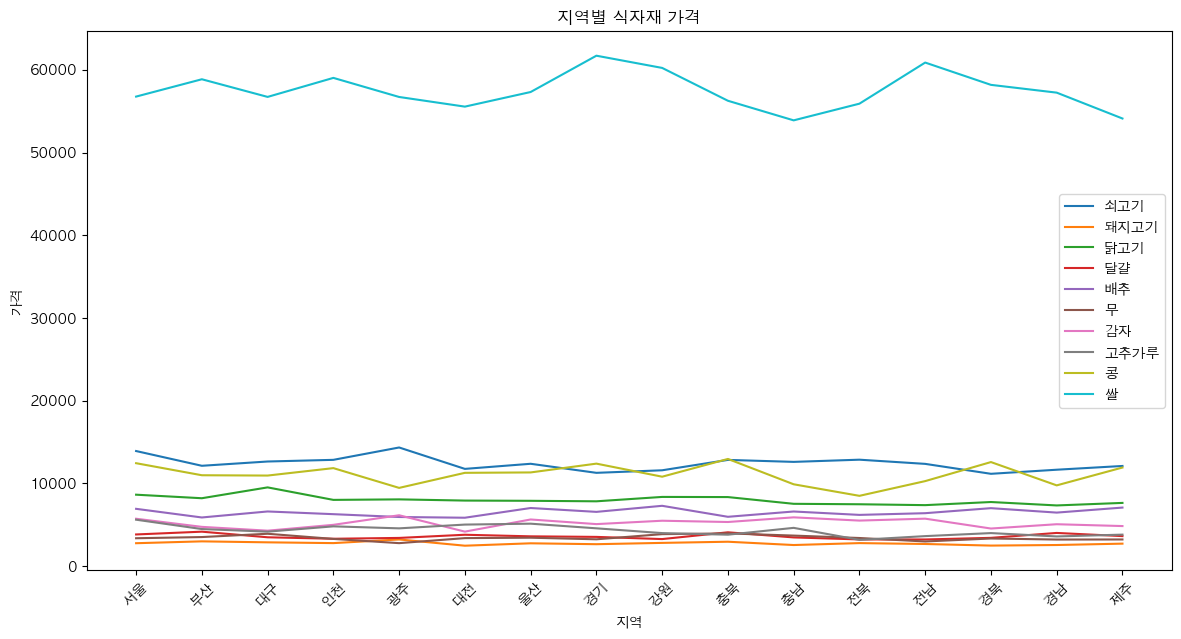

In [53]:
plt.figure(figsize=(14,7)) #그래프 창의 크기

for columns in df.columns:
    plt.plot(df.index, df[columns], label=columns)

plt.title('지역별 식자재 가격')
plt.xlabel('지역')
plt.ylabel('가격')

plt.legend(loc='center right')
plt.xticks(rotation=45)

plt.show()

In [69]:
url = 'https://www.mois.go.kr/frt/sub/a02/farmProductPriceList/screen.do'
driver = webdriver.Chrome()
driver.get(url)
# 작년 데이터와 비교
iframe = driver.find_element(By.CSS_SELECTOR, 'iframe')
driver.switch_to.frame(iframe)

# 드롭 다운 메뉴에서 2024년
dropdown = driver.find_element(By.ID, 'year')
# from selenium.webdriver.support.ui import Select
dropdown.click()
option = driver.find_element(By.XPATH, '//option[text()="2024"]')
option.click()

#조회
search = driver.find_element(By.ID, 'srch')
search.click()

time.sleep(0.5)


head_lst2=[] #식재료
html=driver.find_elements(By.CSS_SELECTOR, 'div.tableBox01 thead th')
for th in html:
    head_lst2.append(th.text)

html = driver.page_source
soup = BeautifulSoup(html,'lxml')
driver.quit()

body_lst2 = [] #가격 2D
index_lst2 = [] #지역
t_body = soup.select('div.tableBox01 tbody tr.first')

for body in t_body:
    price = body.select('td:not(.head)')
    city = body.select_one('td.head')

    index_lst2.append(city.text)
    sub_body = []
    for p in price:
        if p.text.strip() == '-':
            break
        sub_body.append(int(p.text.strip().replace(',','')))

    if len(sub_body) == 0:
        continue
        
    body_lst2.append(sub_body)

print(body_lst2)
print(index_lst2)

[[13721, 2555, 8421, 3687, 4222, 2103, 5505, 5195, 12838, 57818], [11931, 2620, 7708, 3648, 3741, 1616, 4956, 4839, 10972, 58324], [10935, 2620, 8267, 3117, 3657, 1632, 4465, 3473, 10391, 64694], [12210, 2611, 7923, 3340, 3572, 1438, 4726, 4825, 11812, 57733], [13907, 2860, 8386, 3638, 3629, 1776, 5720, 4522, 10252, 61653], [11075, 2318, 8178, 3523, 3799, 1774, 4505, 5498, 11052, 54840], [13245, 2659, 7467, 3685, 3947, 2025, 5653, 5536, 10086, 57233], [11695, 2339, 7896, 3516, 4008, 1672, 4899, 4625, 12564, 64651], [10733, 2427, 7750, 3185, 4462, 1706, 5211, 4125, 10546, 61652], [11664, 2702, 7934, 3696, 3641, 1823, 5477, 4045, 13383, 59514], [10597, 2474, 8076, 3347, 4405, 1820, 4307, 4786, 9517, 56910], [12994, 2464, 7851, 3421, 3590, 1781, 4827, 3417, 8749, 56467], [13168, 2562, 7214, 3230, 3712, 1984, 5536, 3721, 10316, 62263], [10089, 2178, 7751, 3441, 4248, 1860, 4412, 4180, 12041, 59313], [11088, 2533, 7168, 3944, 4122, 1710, 4862, 3707, 9593, 58467], [11973, 2796, 7544, 3623, 3

In [71]:
head_lst2 = head_lst2[1:]
index_lst2.remove('세종')

In [75]:
df2 = pd.DataFrame(body_lst2, columns=head_lst2, index = index_lst2)
df2

,쇠고기,돼지고기,닭고기,달걀,배추,무,감자,고추가루,콩,쌀
서울,13721,2555,8421,3687,4222,2103,5505,5195,12838,57818
부산,11931,2620,7708,3648,3741,1616,4956,4839,10972,58324
대구,10935,2620,8267,3117,3657,1632,4465,3473,10391,64694
인천,12210,2611,7923,3340,3572,1438,4726,4825,11812,57733
광주,13907,2860,8386,3638,3629,1776,5720,4522,10252,61653
대전,11075,2318,8178,3523,3799,1774,4505,5498,11052,54840
울산,13245,2659,7467,3685,3947,2025,5653,5536,10086,57233
경기,11695,2339,7896,3516,4008,1672,4899,4625,12564,64651
강원,10733,2427,7750,3185,4462,1706,5211,4125,10546,61652
충북,11664,2702,7934,3696,3641,1823,5477,4045,13383,59514


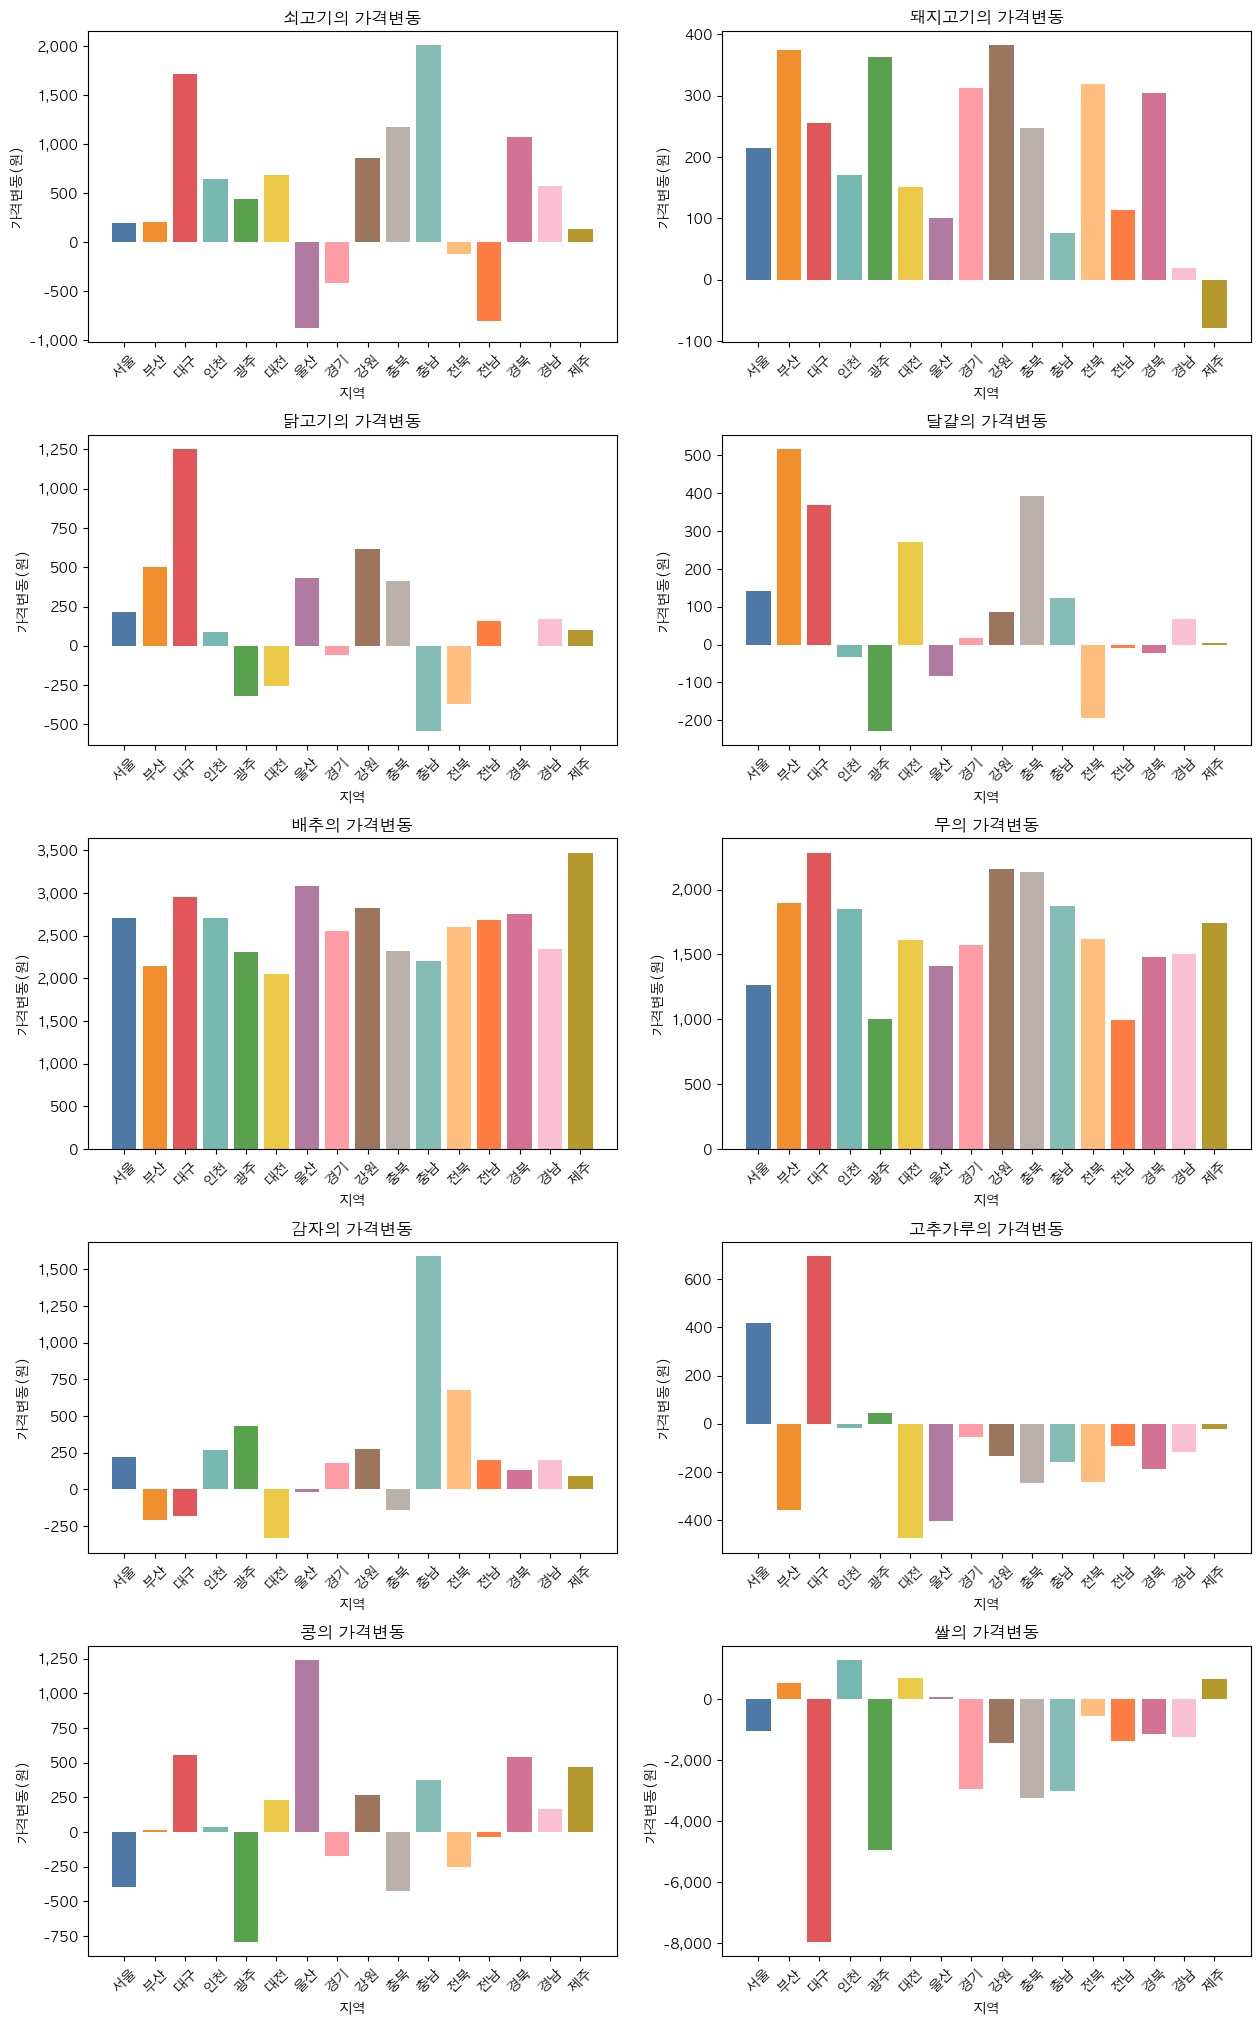

In [113]:
# 2025년 기준으로 가격변동에 대한 그래프

import matplotlib.ticker as ticker

rc('axes',unicode_minus=False)

diff = df - df2


fig,axes = plt.subplots(nrows = 5, ncols=2, figsize=(15,25))
axes = axes.flatten()
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F',
          '#EDC948', '#B07AA1', '#FF9DA7', '#9C755F', '#BAB0AC',
          '#86BCB6', '#FFBE7D', '#FF7C43', '#D37295', '#FABFD2', '#B6992D', '#D4A6C8']

for i,col in enumerate(head_lst):
    ax = axes[i]
    ax.bar(diff.index, diff[col], color= colors)  
    ax.set_title(f'{col}의 가격변동')
    ax.set_xlabel('지역')
    ax.set_ylabel('가격변동(원)')
    ax.tick_params(axis='x', rotation=45)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _ :f'{int(x):,}'))

plt.subplots_adjust(hspace=0.3)

plt.show()